In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#downloading the white_wine.csv dataset
white_wine=pd.read_csv("data/white_wine.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
white_wine.shape

(4898, 12)

In [6]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#substituting the white space for underscore
col=[i.replace(" ", "_") for i in white_wine.columns]
white_wine.columns=col
white_wine.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
#calculating the correlation matrix
cor_white_wine=white_wine.corr(method="pearson")
cor_white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

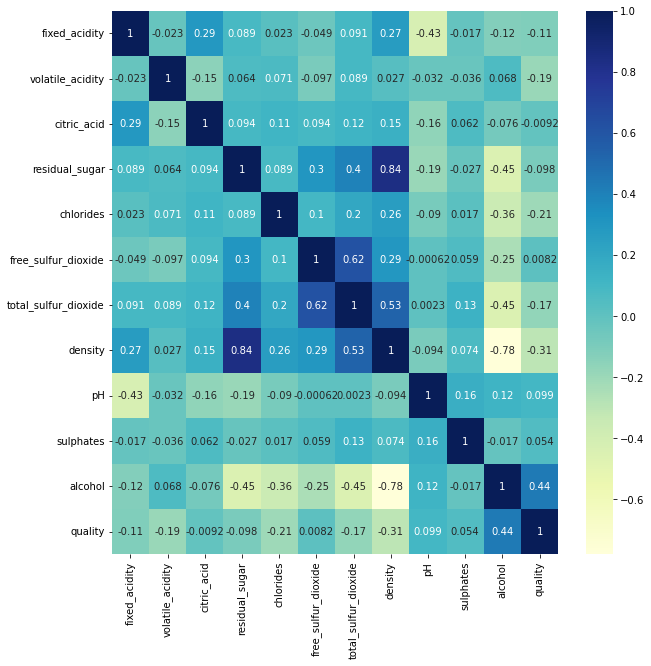

In [9]:
#visualization of the correlation matrix
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor_white_wine, annot=True, cmap="YlGnBu")

In [10]:
"""defining the correlation function that returns highly correlated features.
This function has two arguments"""
def correlation(dataset, threshold):
    col_corr=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname=corr_matrix.columns[j]
                rowname=corr_matrix.index[i]
                col_corr.append((colname, rowname))
    return col_corr
corr_col=correlation(white_wine.iloc[:, :-1], 0.7)
print("Highly correlated variables are ", corr_col)

Highly correlated variables are  [('residual_sugar', 'density'), ('density', 'alcohol')]


In [11]:
"""defining the checking_normality() function that determines highly correlated featurs"""
def checking_normality(dataframe):
    import scipy.stats as st
    for col in dataframe.columns:
        a, b=st.normaltest(dataframe[col])
        if b<0.05:
            print(col+" is not normally distributed")
            print("-"*40)
        else:
            print((col+" is normally distributed"))
            print("-"*40)
checking_normality(white_wine)
        

fixed_acidity is not normally distributed
----------------------------------------
volatile_acidity is not normally distributed
----------------------------------------
citric_acid is not normally distributed
----------------------------------------
residual_sugar is not normally distributed
----------------------------------------
chlorides is not normally distributed
----------------------------------------
free_sulfur_dioxide is not normally distributed
----------------------------------------
total_sulfur_dioxide is not normally distributed
----------------------------------------
density is not normally distributed
----------------------------------------
pH is not normally distributed
----------------------------------------
sulphates is not normally distributed
----------------------------------------
alcohol is not normally distributed
----------------------------------------
quality is not normally distributed
----------------------------------------


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

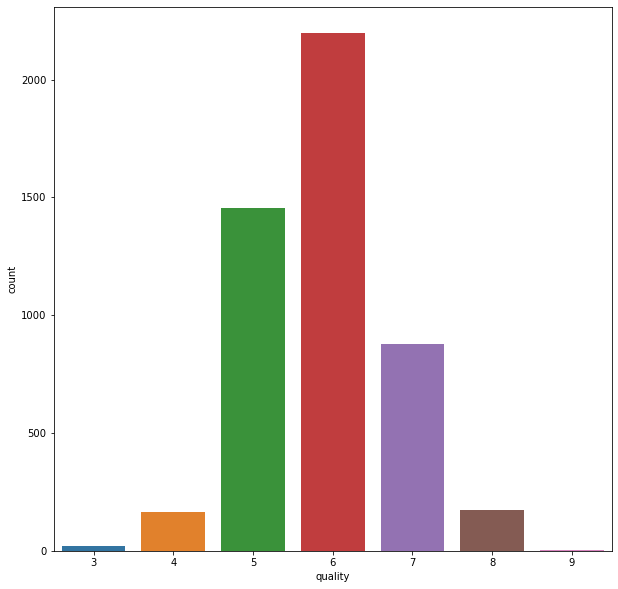

In [12]:
sn.countplot(white_wine["quality"])

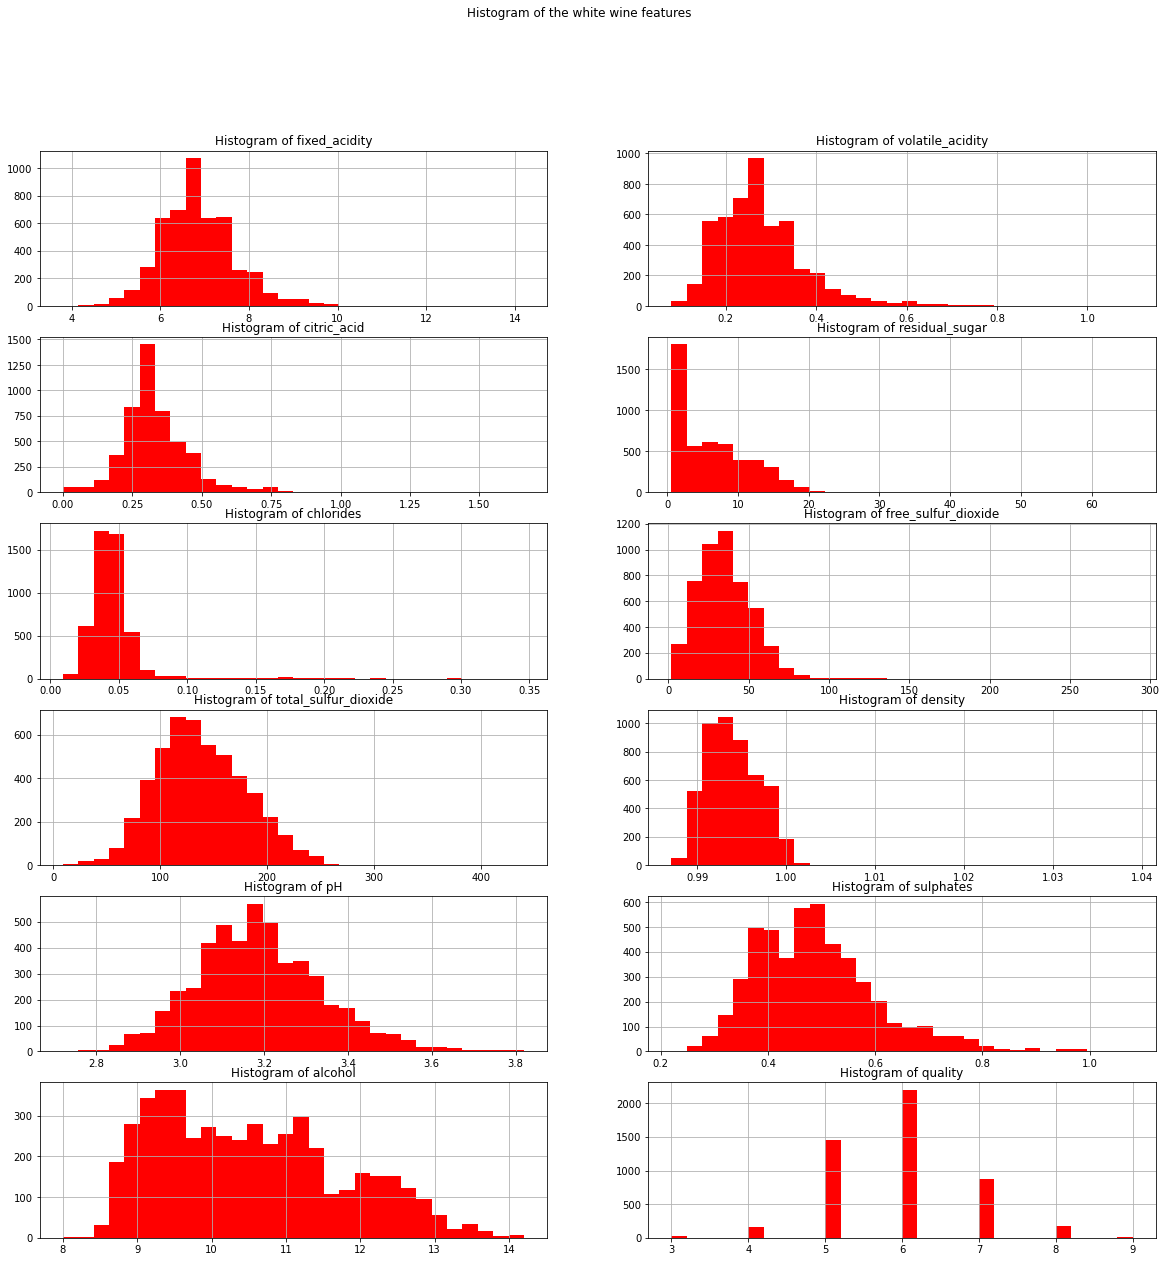

In [13]:
fig=plt.figure(figsize=(20, 20))
fig.suptitle("Histogram of the white wine features")
for i, col in enumerate(white_wine.columns):
    ax=fig.add_subplot(6, 2, i+1)
    ax.set_title("Histogram of "+col)
    white_wine[col].hist(bins=30, ax=ax, facecolor="red")

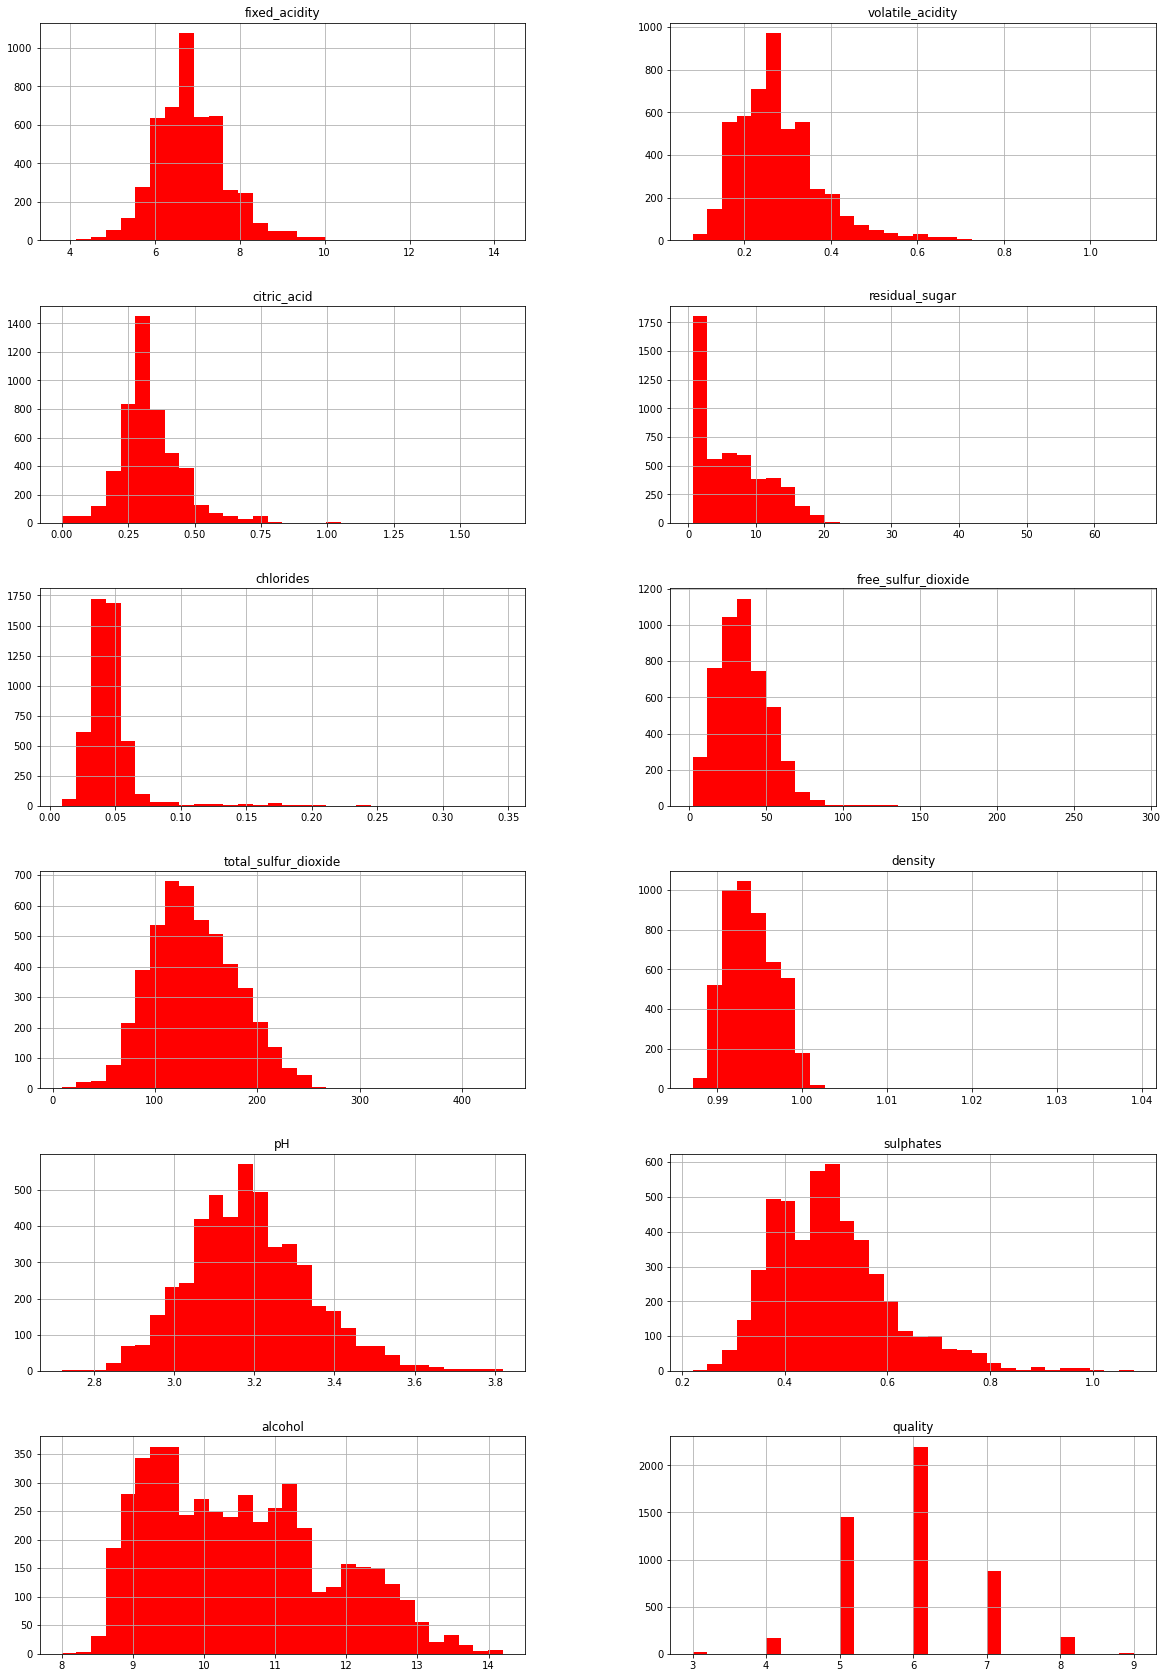

In [14]:

white_wine.hist(bins=30, facecolor="red", layout=(6, 2), figsize=(20, 30))
plt.show()

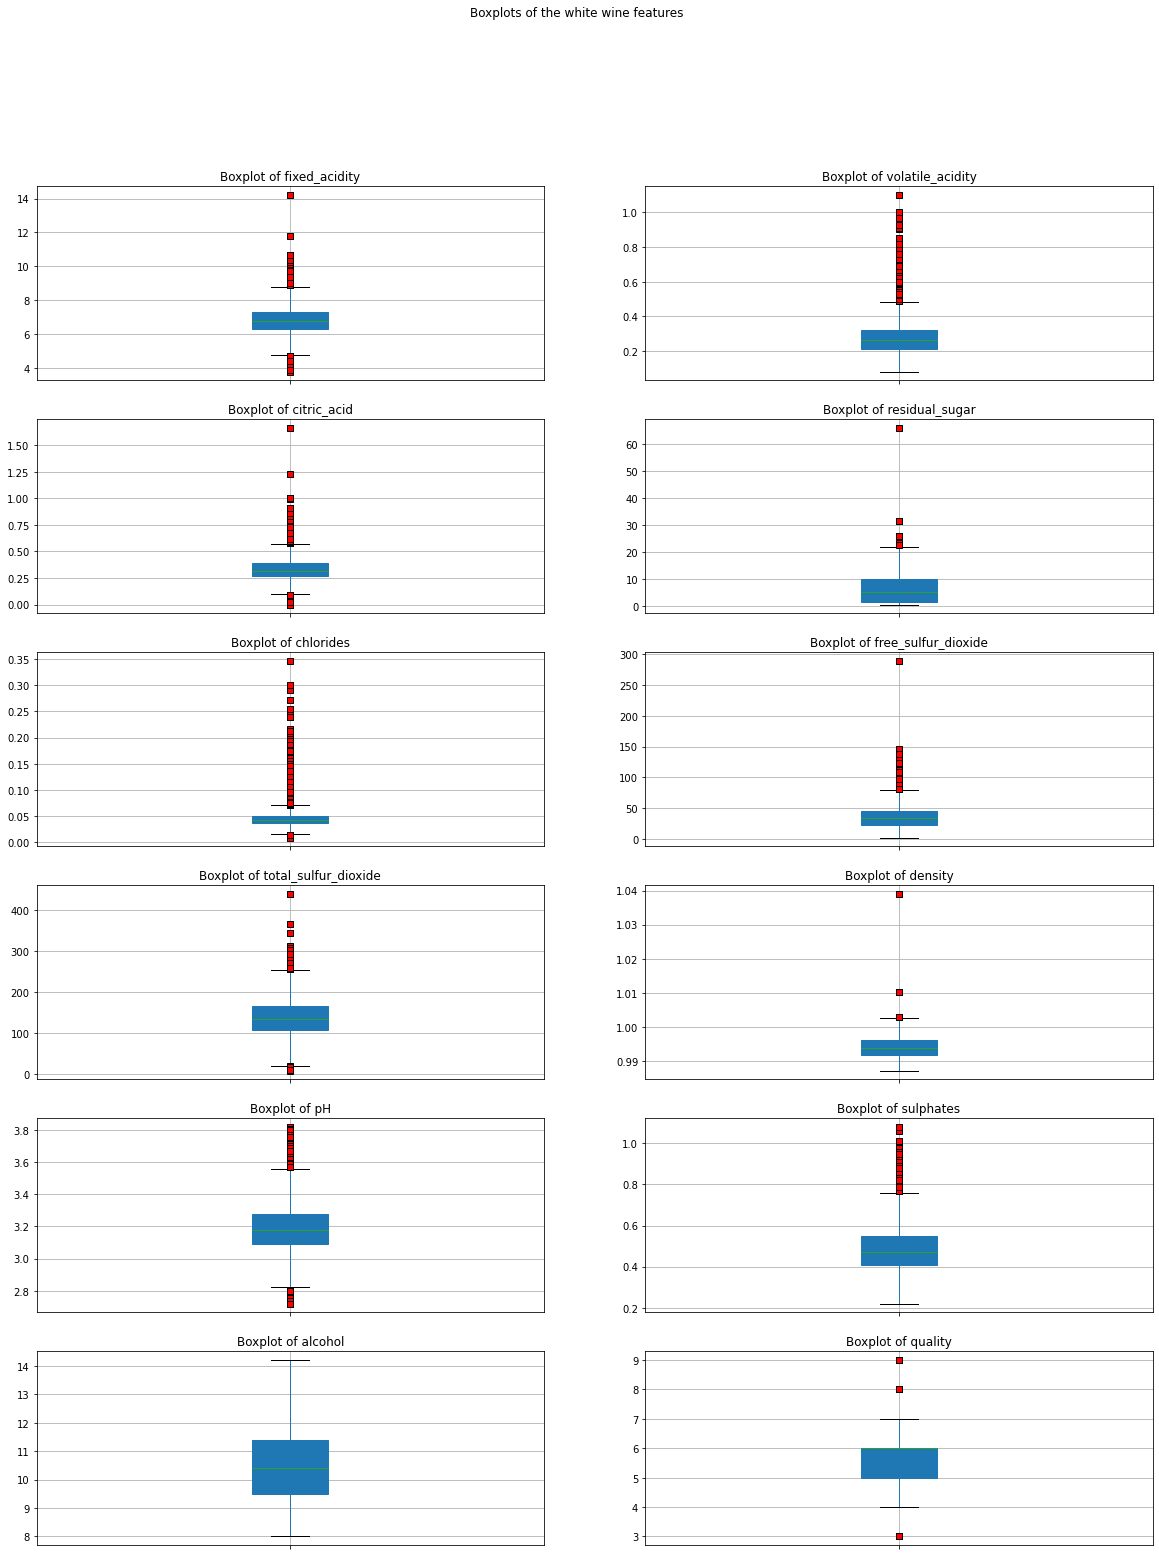

In [15]:
fig=plt.figure(figsize=(20, 25))
red_square=dict(markerfacecolor="r", marker="s")
fig.suptitle("Boxplots of the white wine features")
for i, col in enumerate (white_wine.columns):
    ax=fig.add_subplot(6, 2, i+1)
    ax.set_title("Boxplot of "+col)
    white_wine[[col]].boxplot(ax=ax, flierprops=red_square, patch_artist=True)
    ax.set(xticklabels=[])

In [16]:
#downloading the red_wine.csv dataset
red_wine=pd.read_csv("data/red_wine.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
#descriptive statistics of the red_wine dataframe
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
red_wine.shape

(1599, 12)

In [20]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
#substituting the white space for underscore
col=[i.replace(" ", "_") for i in red_wine.columns]
red_wine.columns=col
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
#calculating the correlation matrix
cor_red_wine=red_wine.corr(method="pearson")
cor_red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

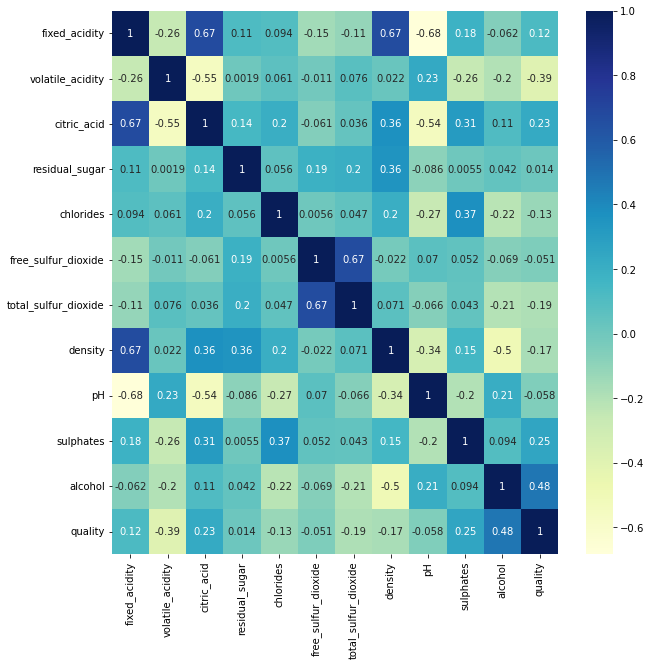

In [23]:
#visualization of the correlation matrix
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor_red_wine, annot=True, cmap="YlGnBu")

In [24]:
#seraching for the highly correlated features
corr_col=correlation(red_wine.iloc[:, :-1], 0.7)
print("Highly correlated variables are ", corr_col)

Highly correlated variables are  []


In [25]:
#checking whether the red wine dataframe features are normally distributed
checking_normality(red_wine)

fixed_acidity is not normally distributed
----------------------------------------
volatile_acidity is not normally distributed
----------------------------------------
citric_acid is not normally distributed
----------------------------------------
residual_sugar is not normally distributed
----------------------------------------
chlorides is not normally distributed
----------------------------------------
free_sulfur_dioxide is not normally distributed
----------------------------------------
total_sulfur_dioxide is not normally distributed
----------------------------------------
density is not normally distributed
----------------------------------------
pH is not normally distributed
----------------------------------------
sulphates is not normally distributed
----------------------------------------
alcohol is not normally distributed
----------------------------------------
quality is not normally distributed
----------------------------------------


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

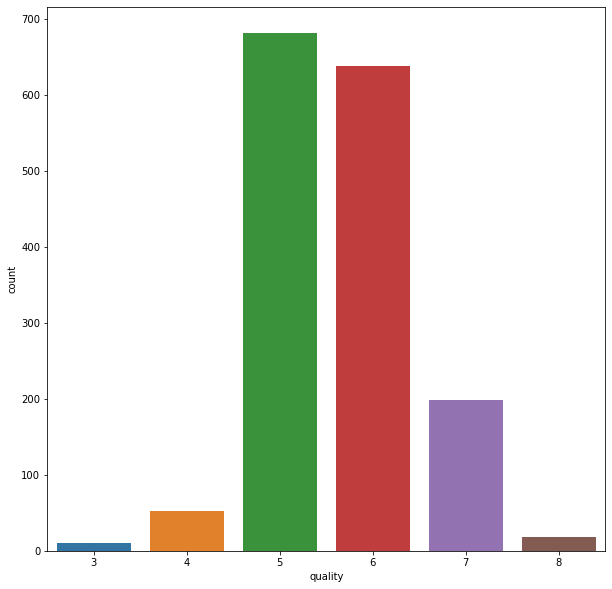

In [26]:
sn.countplot(red_wine["quality"])

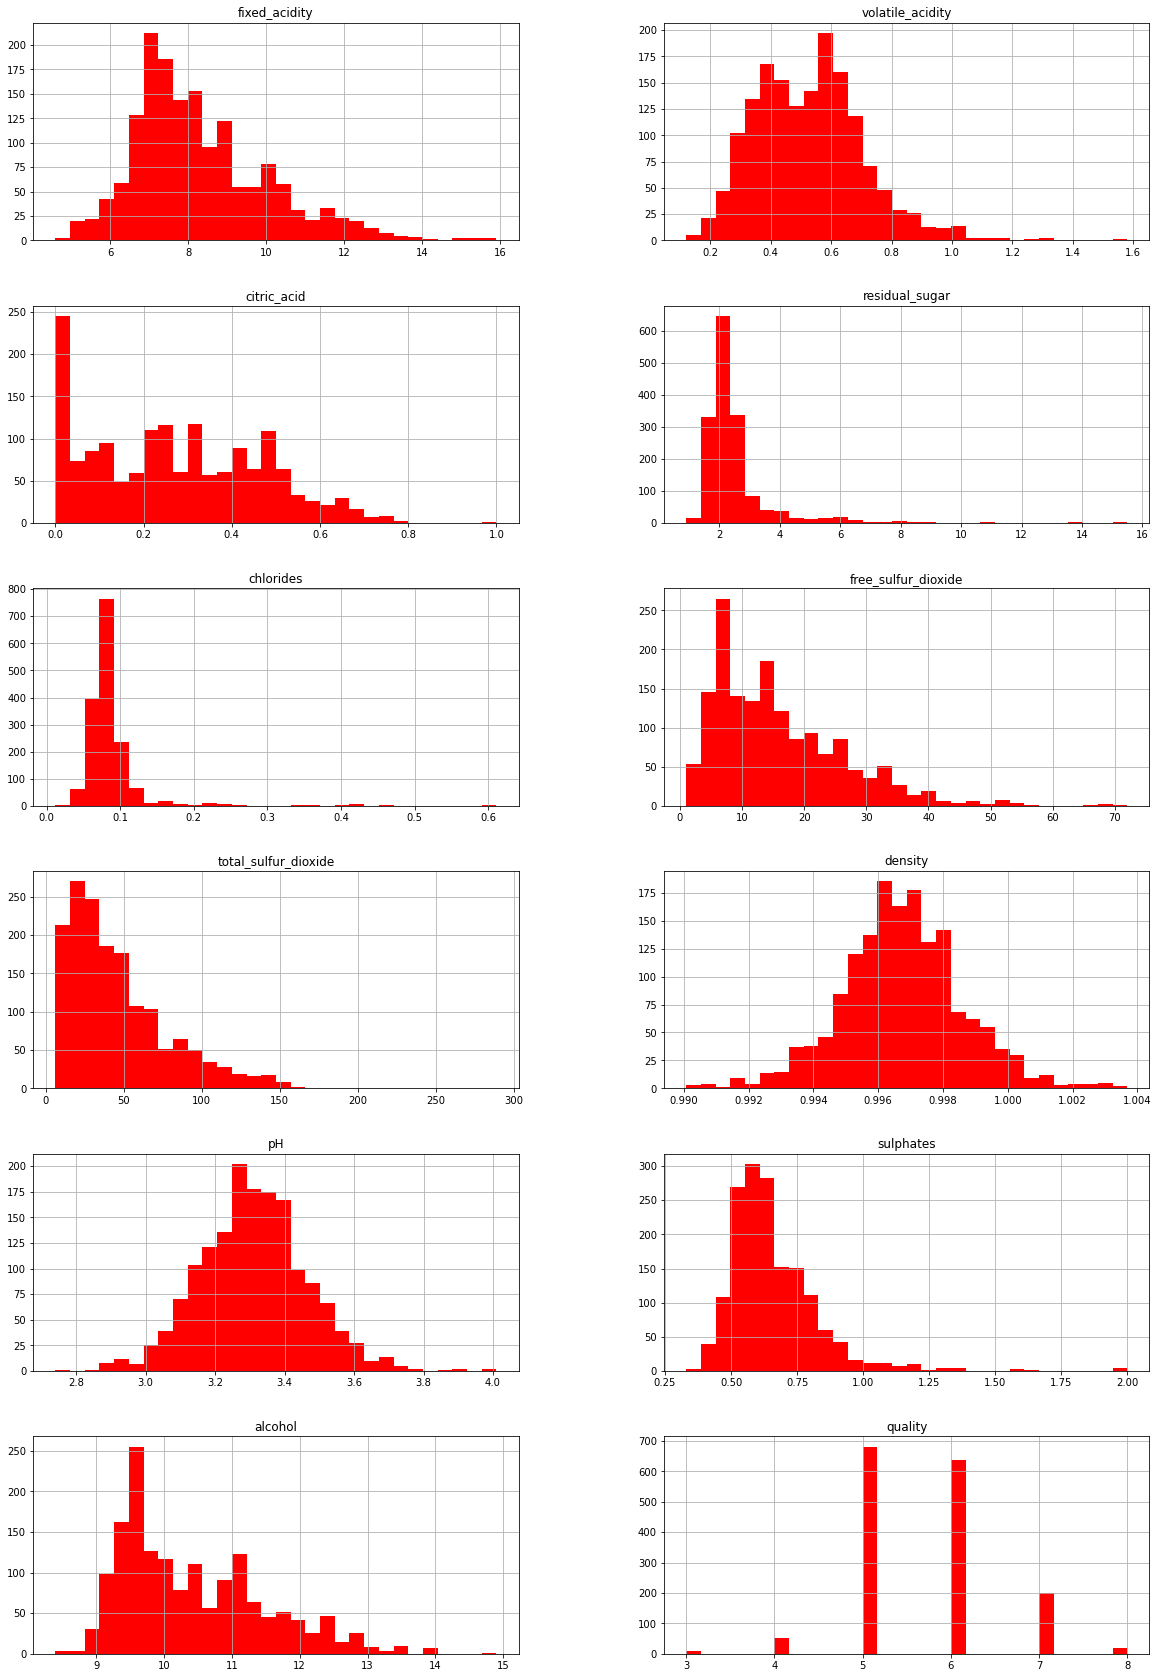

In [27]:

red_wine.hist(bins=30, facecolor="red", layout=(6, 2), figsize=(20, 30))
plt.show()

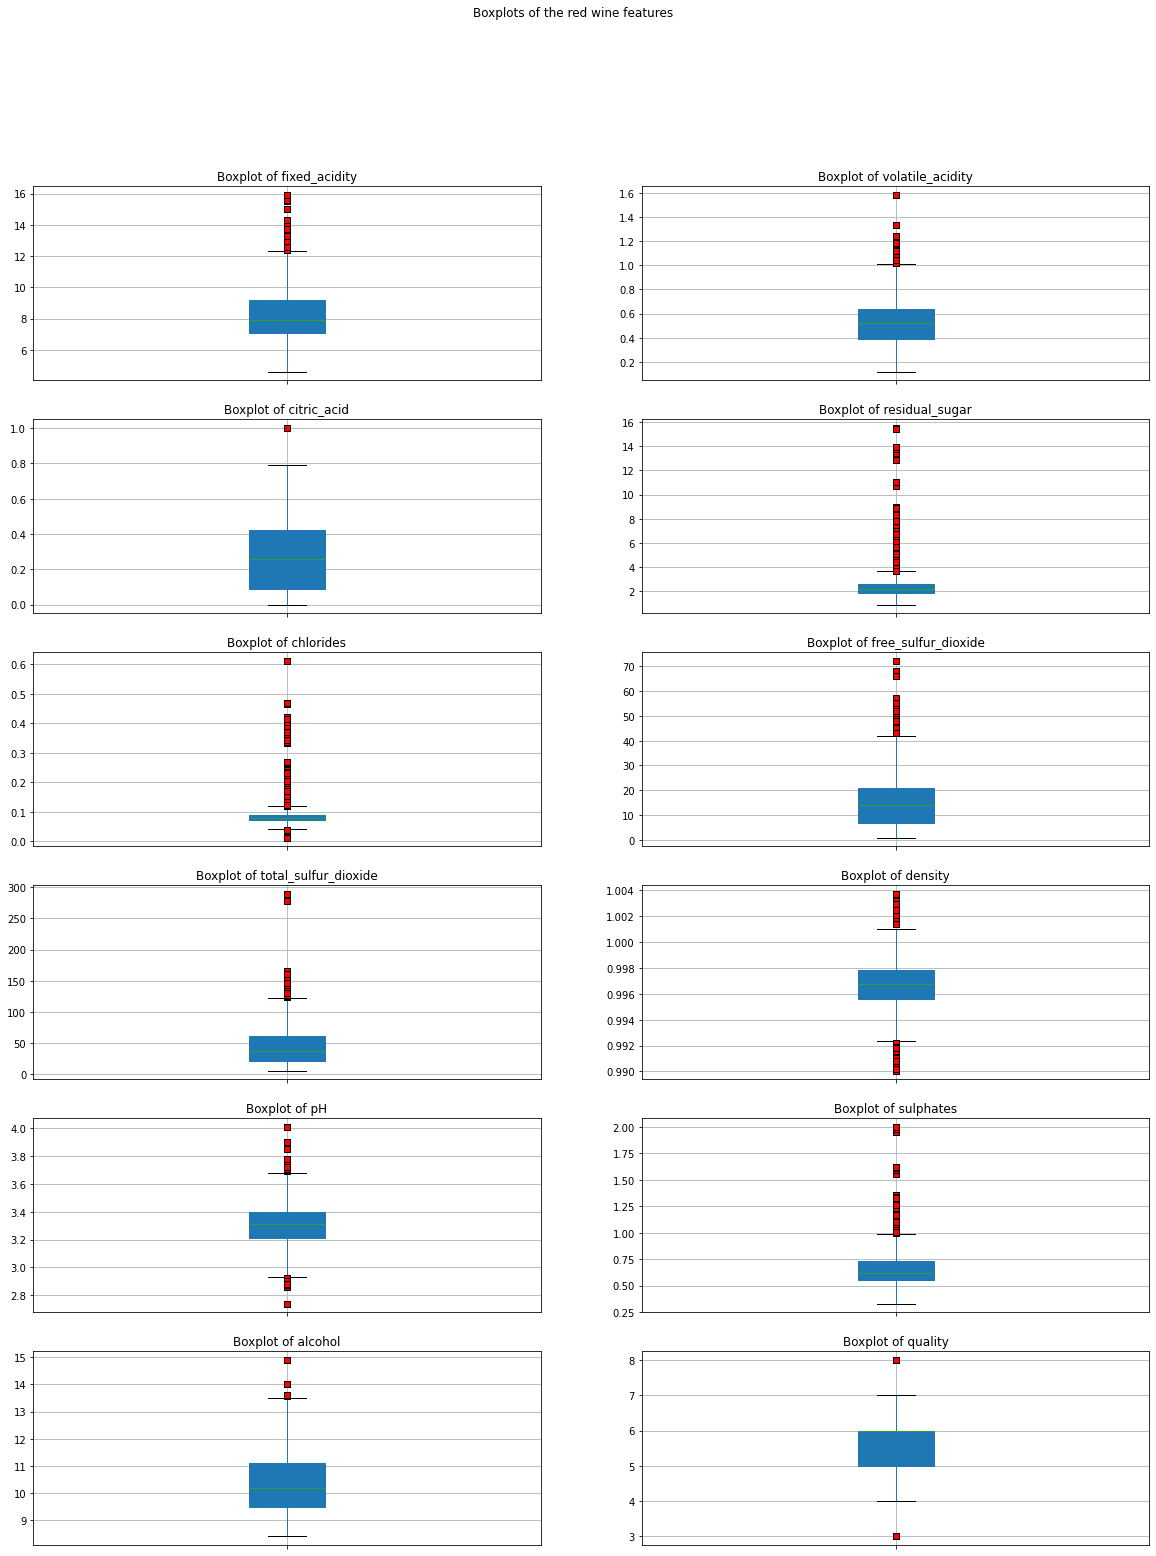

In [28]:
fig=plt.figure(figsize=(20, 25))
red_square=dict(markerfacecolor="r", marker="s")
fig.suptitle("Boxplots of the red wine features")
for i, col in enumerate (red_wine.columns):
    ax=fig.add_subplot(6, 2, i+1)
    ax.set_title("Boxplot of "+col)
    red_wine[[col]].boxplot(ax=ax, flierprops=red_square, patch_artist=True)
    ax.set(xticklabels=[])

In [29]:
wine=pd.concat([white_wine.assign(type="white"), red_wine.assign(type="red")])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [30]:
wine.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

##### The density column should be removed because it is highly correlated with alcohol and residual shugar

In [31]:
wine=wine.drop(columns=["density"])
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6,white


### Wine classification using logistic regression


In [32]:
#preparing labels and values datasets
wine_labels=np.where(wine.type=="red", 1, 0)
wine_features=wine.drop(columns=["quality", "type"])

In [33]:
#preparing train and test datasets
X_train, X_test, y_train, y_test=train_test_split(wine_features, wine_labels, test_size=0.25, random_state=1000, stratify=wine_labels)


In [34]:
#making logistic regression model
model_wine=Pipeline([
    ("scale", StandardScaler()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=1000))
]).fit(X_train, y_train)

In [35]:
model_wine["lr"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1000,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
model_wine["lr"].coef_

array([[ 1.66196771,  1.85450812, -0.06125008, -0.48502752,  1.15447842,
         0.55852204, -3.32021408,  1.40879345,  1.31361751, -0.35875217]])

In [37]:
model_wine["lr"].intercept_

array([-4.11636379])

In [38]:
predicted_labels=model_wine.predict(X_test)

In [39]:

def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """this function returns confusion matrix
       parametres:
       y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Actual', ylabel='Model Prediction'>

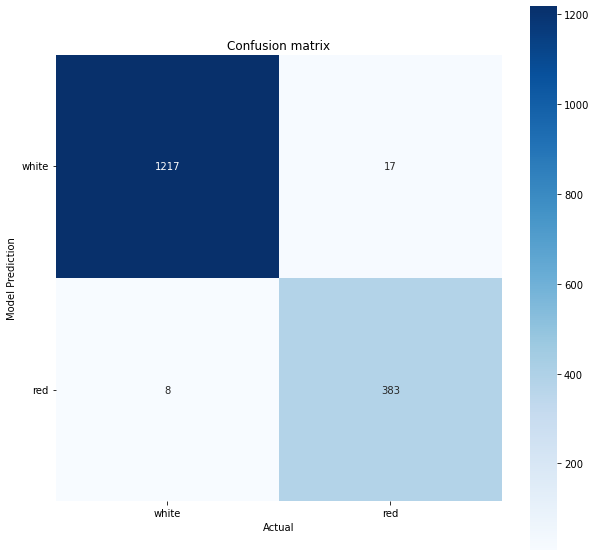

In [40]:
confusion_matrix_visual(y_test, predicted_labels, ["white", "red"])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.98      0.96      0.97       400

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



#### Feature importance

Feature importance will be evaluated by two approaches:<br>
1. Based on logistic regression coefficients<br>
2. Based on EDA (exploratory data analysis) and ratio of mean features of red and white wine

#### Feature importance based on logistic regression coefficients

In [42]:
coefficients = model_wine["lr"].coef_[0]
coefficients

array([ 1.66196771,  1.85450812, -0.06125008, -0.48502752,  1.15447842,
        0.55852204, -3.32021408,  1.40879345,  1.31361751, -0.35875217])

In [43]:
#real coefficient values
feature_importance = pd.DataFrame({'Feature': wine_features.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance

,Feature,Importance
6,total_sulfur_dioxide,-3.320214
3,residual_sugar,-0.485028
9,alcohol,-0.358752
2,citric_acid,-0.061250
5,free_sulfur_dioxide,0.558522
4,chlorides,1.154478
8,sulphates,1.313618
7,pH,1.408793
0,fixed_acidity,1.661968
1,volatile_acidity,1.854508


In [44]:
#absolute coefficient values
feature_importance = pd.DataFrame({'Feature': wine_features.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance

,Feature,Importance
2,citric_acid,0.061250
9,alcohol,0.358752
3,residual_sugar,0.485028
5,free_sulfur_dioxide,0.558522
4,chlorides,1.154478
8,sulphates,1.313618
7,pH,1.408793
0,fixed_acidity,1.661968
1,volatile_acidity,1.854508
6,total_sulfur_dioxide,3.320214


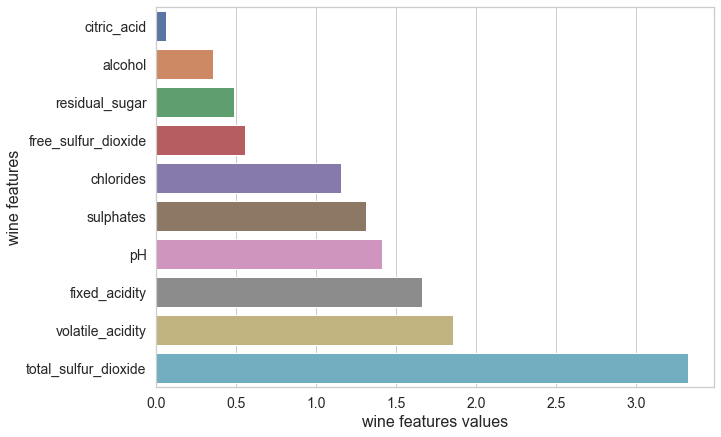

In [46]:
# feature importance plot
plt.figure(figsize=(10, 7))
sn.set_theme(style="whitegrid")
sn.barplot(data=feature_importance, y='Feature', x='Importance', orient='h')
plt.ylabel("wine features", fontsize=16)
plt.xlabel("wine features values", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Featute importance based on EDA (exploratory data analysis) and ratio of mean features of red and white wine

In [47]:
#copying the wine dataframe to wine1 dataframe
wine1=wine
wine1=wine1.drop(columns=["quality"])

In [48]:
col=wine1.columns.to_list()
col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [49]:
#transforming dataframe from wide to long form
wine1=pd.melt(wine1, id_vars=col[-1], value_vars=col[:-1], var_name="Feature")
wine1

,type,Feature,value
0,white,fixed_acidity,7.0
1,white,fixed_acidity,6.3
2,white,fixed_acidity,8.1
3,white,fixed_acidity,7.2
4,white,fixed_acidity,7.2
...,...,...,...
64965,red,alcohol,10.5
64966,red,alcohol,11.2
64967,red,alcohol,11.0
64968,red,alcohol,10.2


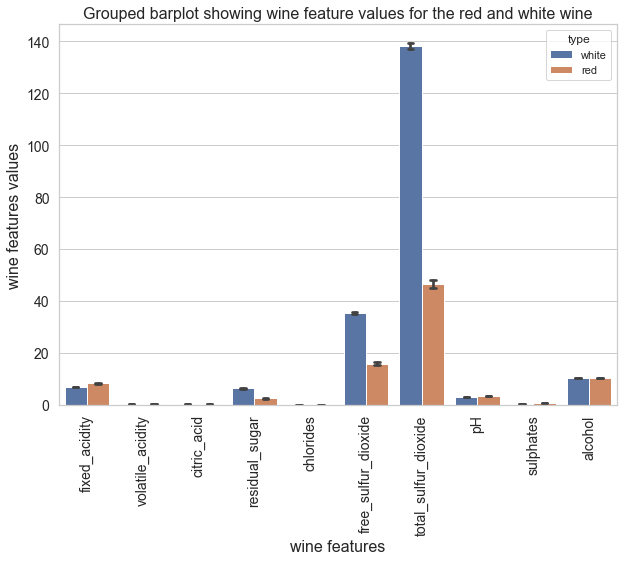

In [51]:
plt.figure(figsize=(10, 7))
sn.set_theme(style="whitegrid")
sn.barplot(data=wine1, x="Feature", y="value", hue="type", ci=95, capsize=0.1)
plt.xlabel("wine features", fontsize=16)
plt.ylabel("wine features values", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.title("Grouped barplot showing wine feature values for the red and white wine", fontsize=16)
plt.savefig("/Users/alexeyefanov/test_site/mysite/wine_barplot.png", bbox_inches='tight')
plt.show()


In [52]:
wine.groupby("type").agg(["mean", "sem"])

fixed_acidity           volatile_acidity           citric_acid  \
               mean       sem             mean       sem        mean   
type                                                                   
red        8.319637  0.043541         0.527821  0.004478    0.270976   
white      6.854788  0.012058         0.278241  0.001440    0.334192   

                residual_sugar           chlorides            ...  \
            sem           mean       sem      mean       sem  ...   
type                                                          ...   
red    0.004872       2.538806  0.035259  0.087467  0.001177  ...   
white  0.001729       6.391415  0.072473  0.045772  0.000312  ...   

      total_sulfur_dioxide                  pH           sulphates            \
                      mean       sem      mean       sem      mean       sem   
type                                                                           
red              46.467792  0.822640  3.311113  0.003861  0.658149  0.004239   
white           138.360657  0.607239  3.188267  0.002158  0.489847  0.001631   

         alcohol             quality            
            mean       sem      mean       sem  
type                                            
red    10.422983  0.026650  5.636023  0.020196  
white  10.514267  0.017584  5.877909  0.012655  

[2 rows x 22 columns]

In [54]:
#the red variable contains mean values of the red wine features 
#the white variable contains mean values of the white wine features 
red=wine.groupby("type").agg(["mean"]).loc["red",]
white=wine.groupby("type").agg(["mean"]).loc["white",]
s=red/white
df=pd.DataFrame({"wine features":wine.columns[:-1], "ratio of mean values of red and white wines":s.values})
df

,wine features,ratio of mean values of red and white wines
0,fixed_acidity,1.213697
1,volatile_acidity,1.896990
2,citric_acid,0.810839
3,residual_sugar,0.397221
4,chlorides,1.910903
5,free_sulfur_dioxide,0.449612
6,total_sulfur_dioxide,0.335845
7,pH,1.038531
8,sulphates,1.343581
9,alcohol,0.991318


#### Conclusion: The most important features to descriminate between white wine and red wine are: 
1. total sulfur dioxide: about 3 times higher in white wine in comparison with red wine
2. residual sugar: about 3 times higher in white wine in comparison with red wine
3. chlorides: about 2 times higher in red wine in comparison with white wine
4. volatile acidity: about 2 times higher in red wine in comparison with white wine